# Price recommmendation - Polynomial Regression
## Chapter 7
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 7 Section 1 - Unsupervised learning of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to work with unsupervised learning models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import model_selection, metrics #To perform model cross validation and scoring
from sklearn.linear_model     import LinearRegression # The linear regression class in scikit learn supports polynomial regression
from sklearn.model_selection  import train_test_split # To create testing and training splits of data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #modeling scoring metrics
from sklearn.preprocessing import PolynomialFeatures #Preprocessing class to generate polynomail features

In [3]:
%matplotlib inline

The 'sale_price' dataset used in this example is synthetically generated and can be downloaded from the following resource: 

* Raw data used: https://github.com/paforme/predictiveanalytics/blob/main/Chapter7/Datasets/sale_price/prod.csv

In [4]:
url = "./Datasets/sale_price/prod.csv" 
sales = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
predictors = ['price']
predicted = ['sales_quantity']

sales = sales.copy()
sales = sales[sales['item_code'] == 52]

sales = sales.dropna() #Preprocess the data to drop empty values
sales

,day,price,sales_quantity,item_code
0,0,1.00,13217.0,52
1,1,1.00,13132.0,52
2,2,1.01,12706.0,52
3,3,1.01,12671.0,52
4,4,1.02,12748.0,52
...,...,...,...,...
295,295,2.96,8429.0,52
296,296,2.97,8375.0,52
297,297,2.98,8269.0,52
298,298,2.99,8097.0,52


In [5]:
#Polynomial Range
degree_min = 1
degree_max = 5 #Change this to 5 if you want to see the metrics for higher degree polynomials

# Train models with increasing polynomail degree and compare scoring metrics
for poly_d in range(degree_min,degree_max+1):
    poly_gen = PolynomialFeatures(degree=poly_d, include_bias=False) #Polynomail generator
    poly_features = poly_gen.fit_transform(sales[predictors]) #Generate polynomail features
    X_train, X_test, y_train, y_test = train_test_split(poly_features, sales[predicted], train_size=0.75, random_state=110) #create Test/Train split
    
    poly_reg_model = LinearRegression() #Define the model
    poly_reg_model.fit(X_train, y_train) #Fit the model
    poly_reg_y_predicted = poly_reg_model.predict(X_test) #predict based on test data
    
    r2 = r2_score(y_test, poly_reg_y_predicted) #R-squared score
    rmse = mean_squared_error(y_test, poly_reg_y_predicted, squared=False) #Root Mean Squared Error
    mae = mean_absolute_error(y_test, poly_reg_y_predicted) #Mean Absolute Error
    
    print("Degree: ", poly_d)
    print("R-Squared: ",r2 )
    print("RMSE: ",rmse) 
    print("MAE: ",mae, "\n") 

Degree:  1
R-Squared:  0.7559499163970949
RMSE:  699.5835213671531
MAE:  496.9973124296418 

Degree:  2
R-Squared:  0.8854371932495118
RMSE:  479.3159856299963
MAE:  293.4003667650572 

Degree:  3
R-Squared:  0.888076591390446
RMSE:  473.76236147771925
MAE:  289.5699290080414 

Degree:  4
R-Squared:  0.8858440705704356
RMSE:  478.46406746871696
MAE:  290.730454125932 

Degree:  5
R-Squared:  0.8857688900251006
RMSE:  478.621594410984
MAE:  290.7797585595142 



Text(0, 0.5, "['sales_quantity']")

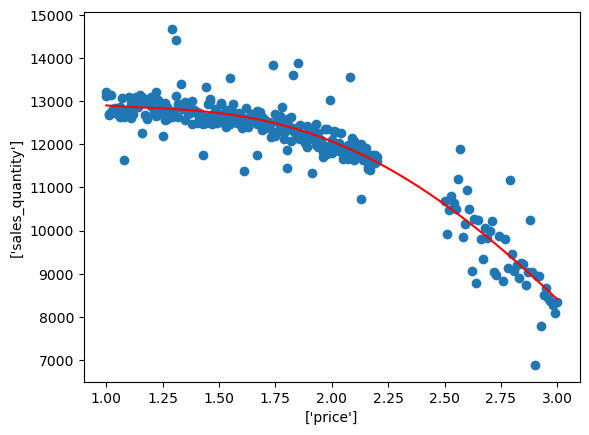

In [6]:
feature_range = np.linspace(1, 3) #Generate x features in range
poly_features = poly_gen.fit_transform(feature_range.reshape(-1,1)) #Generate polynomail features

y_predicted = poly_reg_model.predict(poly_features) #Make predictions on polynomial features
plt.scatter(sales[predictors], sales[predicted]) #Plot actual data
plt.plot(feature_range,y_predicted, c="red") #Plot predictions

plt.xlabel(predictors) 
plt.ylabel(predicted)

In [7]:
y_predicted = y_predicted.flatten() #Flatten the predicted values to a 1d array
total = feature_range*y_predicted #Multiply feature_range values with predicted sales_quantity (Total Sales = price * sales_quantity)
total

array([12903.42089492, 13416.10213516, 13929.45160458, 14442.99520147,
       14956.19588385, 15468.45913913, 15979.138314  , 16487.53980478,
       16992.92810808, 17494.5307318 , 17991.54296656, 18483.13251742,
       18968.44399596, 19446.60327278, 19916.72169028, 20377.90013588,
       20829.23297551, 21269.8118475 , 21698.72931686, 22115.0823899 ,
       22517.97588912, 22906.52568863, 23279.86180975, 23637.13137709,
       23977.50143497, 24300.1616241 , 24604.32671879, 24889.23902435,
       25154.17063493, 25398.42555175, 25621.34166159, 25822.29257576,
       26000.68932928, 26155.98194057, 26287.66083141, 26395.25810724,
       26478.34869791, 26536.55135869, 26569.52953172, 26576.99206773,
       26558.6938082 , 26514.43602784, 26444.06673745, 26347.48084705,
       26224.62018955, 26075.47340457, 25900.07568276, 25698.50837043,
       25470.89843453, 25217.41778801])

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


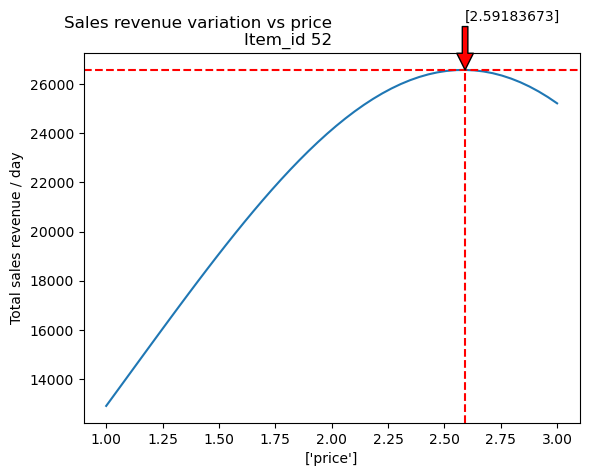

In [8]:
ymax = max(total) #Maximum value for total sales rales revenue
xpos = np.where(total == ymax) #Position of x(price) for Maximum value of total
xmax = feature_range[xpos] #Value of x(price) where total is maximized

fig = plt.figure()
ax = fig.add_subplot()
line = ax.plot(feature_range, total)#Plot total sales revenue vs item price

ax.annotate(xmax, xy=(xmax, ymax), xytext=(xmax, ymax + 2000), arrowprops=dict(facecolor='red'),) #Label the maximum point with the price value

ax.axvline(xmax, color='red', linestyle='dashed') #Vertical line for price
ax.axhline(ymax, color='red', linestyle='dashed') #Horizontal line for total sales revenue

plt.title("Sales revenue variation vs price\nItem_id 52", fontdict={'horizontalalignment': 'right'})
plt.xlabel(predictors) 
plt.ylabel('Total sales revenue / day')

plt.show()

In [9]:
print("Optimal selling price: ", xmax[0])
print("Maximum Daily sale: ", ymax)

Optimal selling price:  2.591836734693877
Maximum Daily sale:  26576.992067725245
